# Preliminary operations

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [3]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

# get training values
X_train = df_data_train.values
y_train = df_info_train['emotion']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

# get test values
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [5]:
# get training values
X_train_speech = df_data_train[df_info_train["vocal_channel"] == "speech"].values
y_train_speech = df_info_train.loc[df_info_train["vocal_channel"] == "speech", "emotion"].values

# get training values
X_train_song = df_data_train[df_info_train["vocal_channel"] == "song"].values
y_train_song = df_info_train.loc[df_info_train["vocal_channel"] == "song", "emotion"].values

In [6]:
#print(len(df_info_train))

#rows2remove = np.random.choice(df_info_train.index, len(df_info_train)//2, replace=False)

#print(len(rows2remove))
#rows2remove

In [7]:
rows2remove = [ 306, 1695,  124,  922,  295,  797, 1306,  716,  629, 1688, 1410,
        827, 1255, 1351,   19,  244,  433, 1216,  837, 1180,   16,  958,
        715,  774,   38,  236,  324, 1272, 1579,  161,  591,  143,  785,
         96,  758,  734, 1107,  285,  896, 1730,  262, 1441,  947, 1079,
        395, 1136,  208, 1596,  308, 1583, 1631,   23, 1168, 1103,  406,
       1584,  609,  299,  724,  286,  929,  238,  885,  139, 1581,  983,
       1651,   51,  857,  142,  269, 1169, 1554,  494,  873, 1187, 1662,
        985,  655,  123, 1303,  832, 1256, 1033, 1209, 1404,  846,  474,
       1552, 1577,  174,  332,  312, 1170,  496,  965, 1150,  137, 1001,
       1328, 1024, 1634,   50, 1563, 1406,  557, 1500, 1260,  735, 1536,
        913,  518,  505,  282, 1081,  628,  277,  541,  388,  509, 1304,
       1175,  757,  798, 1570, 1178, 1571,  215, 1616,  742, 1523, 1337,
        386,  855,  187,  843,   18, 1156,  915, 1293,  507, 1433,  348,
       1359, 1123,  813,  171,  830,  297,  754,  611,   39,  185, 1003,
        439,   14, 1664,  809,  704,  479,  428,  125,  666,  199, 1508,
        844,  824,   74,  585,  103,   93,   56,  300, 1343, 1611,  893,
        553,  575, 1428,  195,  930, 1211,   79, 1297, 1602,  391, 1764,
        994,  477,  112, 1076,  919,  159,  838, 1058,  828, 1380, 1407,
       1593,  568,  773,  317,  555, 1284,  232,  687,  589, 1034, 1678,
        658,   47,  803,  584,  472, 1629,  121, 1741,   65,  875,  166,
       1727,  134,  886, 1265, 1693, 1598,   68,    6,  540, 1102, 1468,
         86,   89,  749,  535, 1751, 1066,  747, 1305, 1550, 1546, 1748,
        887,  314,  806,  146,  267,  616,  847,   55,  599, 1724, 1402,
       1294, 1032,  577,  385,  106, 1436,  482,  995,  745, 1624,  283,
        248,  870, 1418, 1609,  399,  331, 1733,  515,  292,  417,  644,
        404,  622,  544, 1566, 1711, 1753, 1572,  480, 1247, 1770,  437,
        512,  105,  117, 1512,  260,  775,  361, 1373, 1356,   71,  133,
        485,  790,  712,  783, 1292, 1628, 1387, 1237,  943, 1316, 1762,
       1612, 1248,  736,  938, 1128,  777,  158,  258,  547,  964, 1220,
       1131, 1108, 1605,  845,  129, 1746,  818, 1575,   53,  310,  110,
        461, 1685, 1309, 1133, 1434, 1167,   57, 1511, 1266,  116,  596,
       1400,  502,  529,  233,   67,  131,  946,  689,  165,  202,  389,
         32,  865,  898,  264,  252,  881, 1228, 1601, 1087,  833, 1269,
       1195,  274,  320, 1395, 1382, 1207, 1335,  200, 1152,    0,  890,
       1179,  407, 1773,  825, 1332, 1532, 1442,  231,  612,  954, 1250,
        909, 1017,  661, 1157, 1194,  743, 1048,  950,  709,  149,  164,
         80, 1233,   37, 1639, 1028,  968,  290, 1443, 1006, 1295, 1390,
        305, 1480, 1064,  942,  268, 1504,  438,  128,  266,  460, 1190,
        594, 1098, 1573,   36,  115,  755, 1603,  224, 1417, 1147,  152,
       1285,  717, 1110, 1490, 1113, 1668,  928, 1126,  649, 1142,  405,
        493, 1510,  230, 1703,  349,  101, 1652,  276,  402, 1464,  760,
        296, 1176, 1738,  784,  465, 1330, 1757,  487, 1346,  720,  588,
       1506,   48,  119,  669,  564,  708,  226,  207,  425, 1318, 1012,
       1525,  318,  554, 1090,  607,  684, 1042, 1172, 1280, 1005, 1138,
       1357,  280, 1731,  700, 1486, 1706,  807, 1474,   73,  549,  866,
        464, 1320, 1431,  981,  431,  910,  436, 1268, 1344, 1421,  653,
        440,  905,    9,  816,  791,  223,  475,    1,  904,  469, 1772,
        273,  626, 1754,  867, 1429, 1725, 1184,  647,  772,   41,  971,
       1654,  503,  975,  889,  321,  190,  926, 1174,  225,  680, 1239,
        560, 1182,  251, 1561,  741, 1492, 1393,   44, 1011,  374, 1430,
       1173,  876, 1369, 1000, 1425, 1105,  639,  281, 1438, 1432,  478,
       1638, 1565, 1289, 1057,  536,  859,  393,  556,  432,  218, 1647,
       1101, 1070,  492,  463,  892,  122, 1342, 1254,  504, 1413,  138,
        695, 1621, 1391, 1023, 1580,   66, 1521, 1047, 1671,  795,   75,
       1578, 1755, 1229,  688,  630,  640, 1035,  765,  229, 1610,  850,
        242, 1010,  154, 1543,  562,  245, 1112, 1719,  590, 1165, 1460,
        313, 1339, 1388,  382,  140, 1002,  390,  831, 1649, 1275,  175,
       1595,   24, 1457, 1096,  701,  346, 1472, 1714, 1728,   42, 1736,
        730, 1454,  204,   13,  150, 1408,  970,  188, 1324,  739,  788,
        239, 1037,  637,  623, 1555, 1767,  367,  723, 1307,  532, 1670,
       1219, 1104,  377,  368,  355,  711,  697,  415,  576, 1050,  668,
        189, 1347,  884, 1750, 1591, 1440,  650,  357,  908,  963,  578,
       1137,  378, 1401,  337, 1665,  698,   85,  168,  241, 1765,  812,
        620,  624,  973,  581,  652,  665, 1286,  842,  350, 1258, 1723,
        325,  104, 1204, 1517, 1127,   77, 1018,  992,  342, 1109, 1210,
        672, 1279,  625,  176,  484,  307,  744,  413,  862, 1676, 1236,
       1077,  839, 1163,   84, 1456,  690, 1498, 1702, 1426, 1560, 1414,
        941, 1520, 1466, 1111,  787, 1162, 1099,   54, 1368,  869, 1267,
       1094,   95, 1203,  621,  566,  212, 1477, 1643,  685, 1334,  434,
       1227,  422,  423,  642, 1590,   99,  449, 1569, 1667,  879, 1515,
       1308, 1462, 1734,  582, 1191, 1375,  246,  691, 1587,  315,  359,
        213,  523,  811,  895,  633, 1188,  491, 1635,   43,  752, 1744,
       1502,  454, 1478,  210,  733, 1119,  160, 1424,  380,  722,  486,
        917, 1620,  148,  221,  900,  940,  897,  235,  113,  211, 1717,
        214,  984,  674, 1302,  272, 1080,  470, 1148, 1659,  362,  483,
       1640,  746,  453,  354, 1100,  254, 1213, 1198,  725, 1501,   90,
       1630,  769,  713,   10, 1338, 1729,  519, 1040, 1385,  182,  817,
       1063, 1534, 1073,   94,  598, 1092,  732,   20, 1707,  782,   97,
        430, 1143, 1594, 1071,  618, 1377,  278, 1518,  353,  467, 1559,
        525,  304,  114, 1242, 1221, 1144,  384, 1558, 1139, 1166,  671,
        645, 1124, 1467, 1409, 1217,  473, 1704, 1735, 1004]

# get new training dataset
df2_data_train = df_data_train.drop(index=rows2remove, axis=0)
df2_info_train = df_info_train.drop(index=rows2remove, axis=0)

# get training values
X_train_50 = df2_data_train.values
y_train_50 = df2_info_train['emotion']

#Linear SVC

## Hyperparameter tuning

In [ ]:
# get LinearSVC
clf = LinearSVC(
    random_state=0, 
    multi_class='ovr' #Determines the multi-class strategy if y contains more than two classes.
) 

# defining parameter range
#Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10], 
    "dual": [True, False]
} 

RSKF = RepeatedStratifiedKFold(
    n_splits=20, 
    n_repeats=3, 
    random_state=0
)

grid = RandomizedSearchCV(
    clf,
    n_iter=1500,
    param_distributions = param_grid,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

In [ ]:
grid_scores.to_excel("tuning_scores_LinearSVC.xlsx")

###Model Behavior

In [ ]:
grid_scores = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Classification/Tuning data/tuning_scores_LinearSVC.xlsx", index_col="Unnamed: 0")

In [ ]:
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dual,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,mean_test_score,std_test_score,rank_test_score
0,0.091958,0.008844,0.001601,0.000760,True,0.001,"{'dual': True, 'C': 0.001}",0.494382,0.494382,0.426966,...,0.539326,0.426966,0.460674,0.483146,0.404494,0.500000,0.545455,0.478633,0.054339,8
1,0.305076,0.134880,0.002476,0.002753,False,0.001,"{'dual': False, 'C': 0.001}",0.494382,0.494382,0.426966,...,0.539326,0.426966,0.460674,0.483146,0.404494,0.500000,0.545455,0.478633,0.054339,8
2,0.172548,0.004900,0.001489,0.000093,True,0.010,"{'dual': True, 'C': 0.01}",0.516854,0.494382,0.438202,...,0.550562,0.516854,0.494382,0.561798,0.449438,0.500000,0.511364,0.498487,0.050588,1
3,0.361628,0.105243,0.001884,0.001337,False,0.010,"{'dual': False, 'C': 0.01}",0.516854,0.494382,0.438202,...,0.550562,0.516854,0.494382,0.561798,0.449438,0.500000,0.511364,0.498487,0.050588,1
4,1.163714,0.250264,0.001724,0.001072,True,0.100,"{'dual': True, 'C': 0.1}",0.550562,0.505618,0.438202,...,0.550562,0.494382,0.449438,0.494382,0.471910,0.534091,0.477273,0.498310,0.049220,3
5,0.431929,0.115745,0.001707,0.000937,False,0.100,"{'dual': False, 'C': 0.1}",0.550562,0.505618,0.438202,...,0.550562,0.494382,0.449438,0.494382,0.471910,0.534091,0.477273,0.498121,0.049060,4
6,3.842266,0.718588,0.002001,0.001379,True,1.000,"{'dual': True, 'C': 1}",0.561798,0.483146,0.438202,...,0.550562,0.483146,0.449438,0.460674,0.471910,0.534091,0.488636,0.494010,0.050134,5
7,0.458948,0.131525,0.001797,0.001285,False,1.000,"{'dual': False, 'C': 1}",0.550562,0.483146,0.438202,...,0.550562,0.483146,0.449438,0.460674,0.471910,0.534091,0.488636,0.493448,0.049087,6
8,4.177050,0.712832,0.002033,0.001461,True,10.000,"{'dual': True, 'C': 10}",0.449438,0.483146,0.426966,...,0.483146,0.449438,0.438202,0.426966,0.426966,0.488636,0.375000,0.440939,0.051809,10
9,0.467523,0.133038,0.002202,0.001812,False,10.000,"{'dual': False, 'C': 10}",0.550562,0.483146,0.438202,...,0.550562,0.483146,0.460674,0.471910,0.471910,0.534091,0.488636,0.493261,0.049531,7


In [ ]:
grid_scores.loc[grid_scores["param_C"] == 0.001, "mean_test_score"].mean()

nan

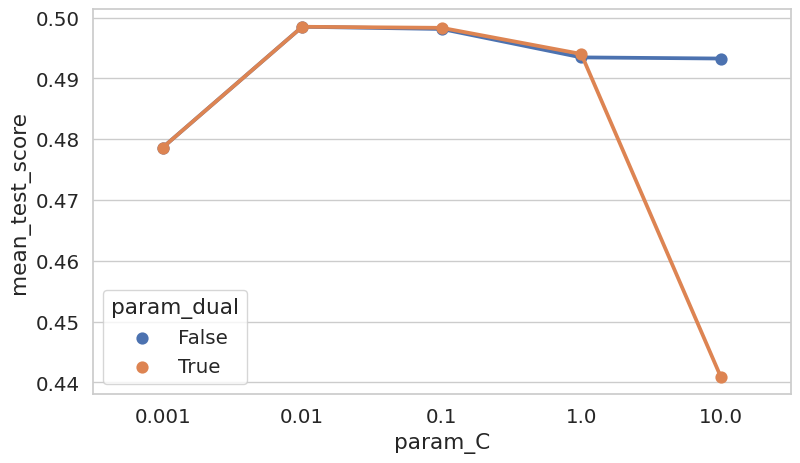

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.pointplot(
    data=grid_scores, 
    x="param_C", 
    y="mean_test_score",
    hue="param_dual"
)

plt.savefig("linearSVC_C_param.svg")

##Classification

### All

In [ ]:
# get LinearSVC
clf = LinearSVC(
    random_state=0, 
    multi_class='ovr',
    dual=True,
    C=0.01
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.39700996677740863
              precision    recall  f1-score   support

       angry       0.40      0.74      0.52        94
        calm       0.43      0.47      0.45        91
     disgust       0.50      0.40      0.44        48
     fearful       0.43      0.32      0.36        92
       happy       0.37      0.22      0.27        93
     neutral       0.26      0.15      0.19        46
         sad       0.35      0.32      0.34        94
   surprised       0.38      0.48      0.42        44

    accuracy                           0.40       602
   macro avg       0.39      0.39      0.37       602
weighted avg       0.39      0.40      0.38       602



In [ ]:
# con multi_class='crammer_singer' viene accuracy=0.39

In [ ]:
predict_proba_dist = clf.decision_function(X_test)

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [ ]:
pred_probability = []
for eachArr in predict_proba_dist:
    pred_probability.append(softmax(eachArr))

In [ ]:
print('ROC-AUC %s' % roc_auc_score(y_test, pred_probability, multi_class="ovr"))

ROC-AUC 0.828618598500523


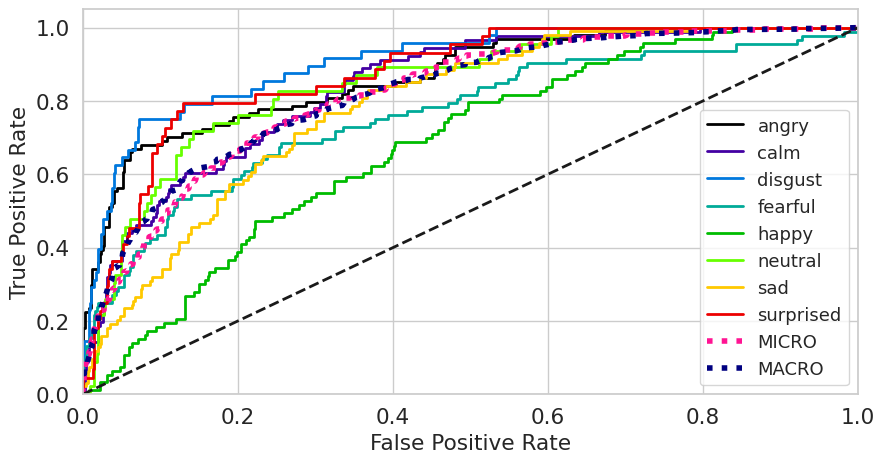

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.decision_function(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("LinearSVC_ROC.svg", format="svg")

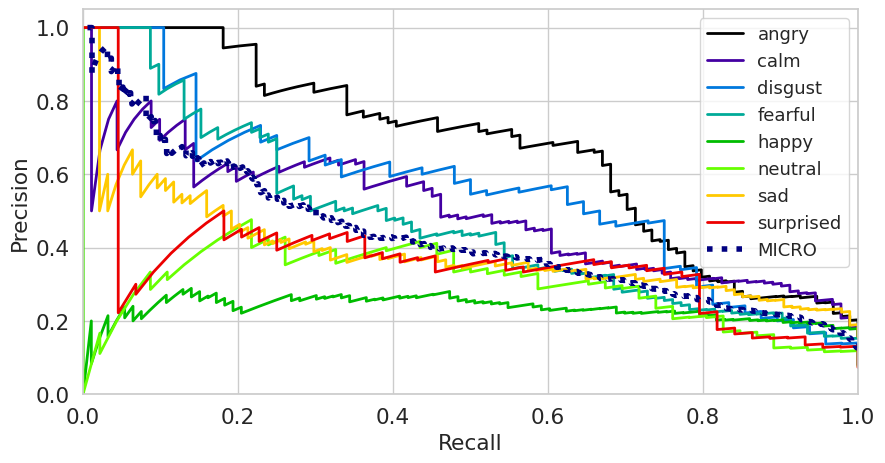

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.decision_function(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("LinearSVC_Precision_Recall.svg", format="svg")

####Feature Importances

In [ ]:
feat_imp = abs(clf.coef_).transpose()
feat_imp = np.mean(feat_imp, axis=1)

df_feat_imp = pd.DataFrame(feat_imp, index=df_data_train.columns, columns=["coef"])
df_feat_imp = df_feat_imp.sort_values("coef", ascending=False)
df_feat_imp

,coef
mfcc_max,0.115279
mfcc_q95,0.105423
std,0.097662
q25,0.086640
zc_sum_w2,0.084193
...,...
sc_skew_w4,0.013224
stft_kur_w1,0.012342
skew_w4,0.012034
lag1_sum_w4,0.011299


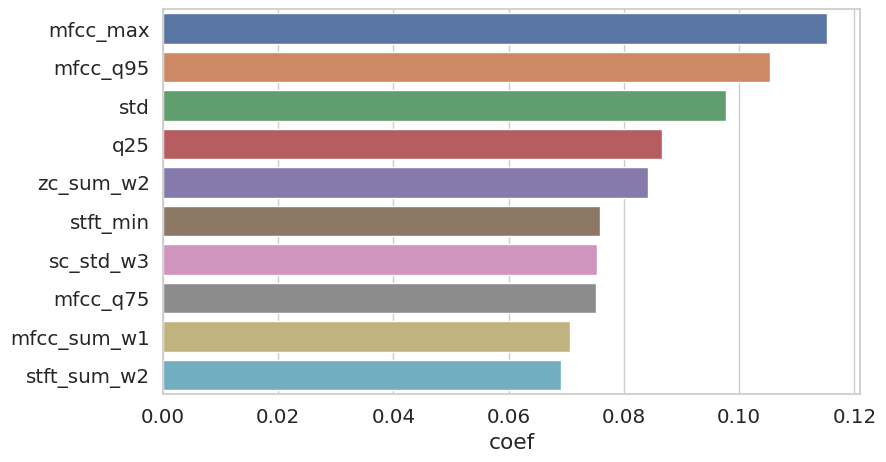

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.barplot(
    data =df_feat_imp[:10],
    x="coef", 
    y=df_feat_imp.index[:10], 
    orient='h',
    )

plt.savefig("linearSVC_features.svg")

### All (50%)

In [ ]:
# get LinearSVC
clf = LinearSVC(
    random_state=0, 
    multi_class='ovr',
    dual=True,
    C=0.01
)

clf.fit(X_train_50, y_train_50)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.38205980066445183
              precision    recall  f1-score   support

       angry       0.40      0.80      0.54        94
        calm       0.45      0.48      0.47        91
     disgust       0.51      0.42      0.46        48
     fearful       0.37      0.35      0.36        92
       happy       0.26      0.11      0.15        93
     neutral       0.24      0.24      0.24        46
         sad       0.30      0.21      0.25        94
   surprised       0.45      0.41      0.43        44

    accuracy                           0.38       602
   macro avg       0.37      0.38      0.36       602
weighted avg       0.37      0.38      0.36       602



### Just Speech

In [ ]:
# get LinearSVC
clf = LinearSVC(
    random_state=0, 
    multi_class='ovr',
    dual=True,
    C=0.01
)

clf.fit(X_train_speech, y_train_speech)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3554817275747508
              precision    recall  f1-score   support

       angry       0.39      0.47      0.43        94
        calm       0.35      0.63      0.45        91
     disgust       0.35      0.60      0.44        48
     fearful       0.40      0.28      0.33        92
       happy       0.27      0.19      0.23        93
     neutral       0.33      0.04      0.08        46
         sad       0.30      0.18      0.23        94
   surprised       0.41      0.48      0.44        44

    accuracy                           0.36       602
   macro avg       0.35      0.36      0.33       602
weighted avg       0.35      0.36      0.33       602



### Just Song

In [ ]:
# get LinearSVC
clf = LinearSVC(
    random_state=0, 
    multi_class='ovr',
    dual=True,
    C=0.01
)

clf.fit(X_train_song, y_train_song)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

Accuracy 0.35714285714285715
              precision    recall  f1-score   support

       angry       0.35      0.84      0.50        94
        calm       0.45      0.45      0.45        91
     fearful       0.33      0.38      0.35        92
       happy       0.39      0.14      0.21        93
     neutral       0.25      0.37      0.30        46
         sad       0.38      0.32      0.35        94

   micro avg       0.36      0.42      0.39       510
   macro avg       0.36      0.42      0.36       510
weighted avg       0.37      0.42      0.36       510



# NON-Linear SVC





## Hyperparameter tuning

In [ ]:
# get LinearSVC
clf = SVC(
    random_state=0,
) 

# defining parameter range
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10], 
    'gamma': ['auto', 'scale'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
} 

RSKF = RepeatedStratifiedKFold(
    n_splits=20, 
    n_repeats=3, 
    random_state=0
)

grid = RandomizedSearchCV(
    clf,
    n_iter=1500,
    param_distributions = param_grid,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 60 folds for each of 40 candidates, totalling 2400 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 40 is smaller than n_iter=1500. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
SVC(C=10, gamma='auto', random_state=0)
0.6149323289070481


In [ ]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,...,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,mean_test_score,std_test_score,rank_test_score
0,0.370353,0.103409,0.015960,0.005548,linear,auto,0.001,"{'kernel': 'linear', 'gamma': 'auto', 'C': 0.001}",0.494382,0.382022,...,0.370787,0.393258,0.460674,0.348315,0.359551,0.454545,0.454545,0.421463,0.051234,19
1,0.435720,0.122102,0.016197,0.006557,poly,auto,0.001,"{'kernel': 'poly', 'gamma': 'auto', 'C': 0.001}",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.172651,0.037412,35
2,0.503011,0.129581,0.032637,0.009237,rbf,auto,0.001,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 0.001}",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.173587,0.037494,31
3,0.622709,0.156780,0.022171,0.006491,sigmoid,auto,0.001,"{'kernel': 'sigmoid', 'gamma': 'auto', 'C': 0....",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.169654,0.032457,39
4,0.361427,0.106822,0.016340,0.005890,linear,scale,0.001,"{'kernel': 'linear', 'gamma': 'scale', 'C': 0....",0.494382,0.382022,...,0.370787,0.393258,0.460674,0.348315,0.359551,0.454545,0.454545,0.421463,0.051234,19
5,0.435458,0.123598,0.016532,0.005473,poly,scale,0.001,"{'kernel': 'poly', 'gamma': 'scale', 'C': 0.001}",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.172651,0.037412,35
6,0.502093,0.132734,0.034897,0.011959,rbf,scale,0.001,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 0.001}",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.173587,0.037494,31
7,0.621289,0.160447,0.022532,0.006273,sigmoid,scale,0.001,"{'kernel': 'sigmoid', 'gamma': 'scale', 'C': 0...",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.169654,0.032457,39
8,0.310123,0.094144,0.016078,0.005961,linear,auto,0.01,"{'kernel': 'linear', 'gamma': 'auto', 'C': 0.01}",0.573034,0.494382,...,0.516854,0.426966,0.505618,0.460674,0.449438,0.545455,0.500000,0.498678,0.058943,13
9,0.451010,0.121379,0.016146,0.005043,poly,auto,0.01,"{'kernel': 'poly', 'gamma': 'auto', 'C': 0.01}",0.157303,0.157303,...,0.146067,0.146067,0.146067,0.157303,0.157303,0.159091,0.159091,0.172651,0.037412,35


In [ ]:
grid_scores.to_excel("tuning_scores_NonLinearSVC.xlsx")

##Classification

### All

In [35]:
clf = SVC(
    C=10, 
    gamma='auto', 
    kernel='rbf',
    random_state=0,
    probability=True
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC %s" % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.4601328903654485
              precision    recall  f1-score   support

       angry       0.48      0.71      0.57        94
        calm       0.55      0.54      0.54        91
     disgust       0.46      0.54      0.50        48
     fearful       0.49      0.38      0.43        92
       happy       0.40      0.34      0.37        93
     neutral       0.54      0.30      0.39        46
         sad       0.34      0.35      0.35        94
   surprised       0.49      0.48      0.48        44

    accuracy                           0.46       602
   macro avg       0.47      0.46      0.45       602
weighted avg       0.46      0.46      0.45       602

ROC-AUC 0.851820973886585


In [36]:
!pip install scikitplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [37]:
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import matplotlib.pyplot as plt 

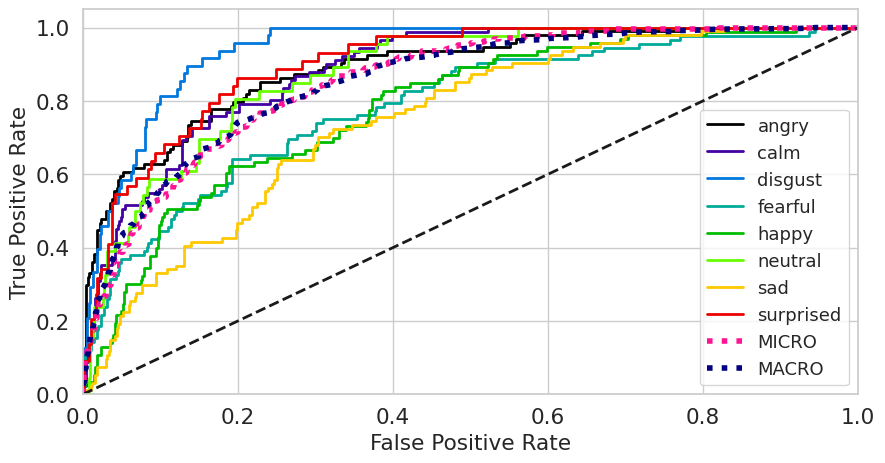

In [38]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("MLP_ROC.svg", format="svg")

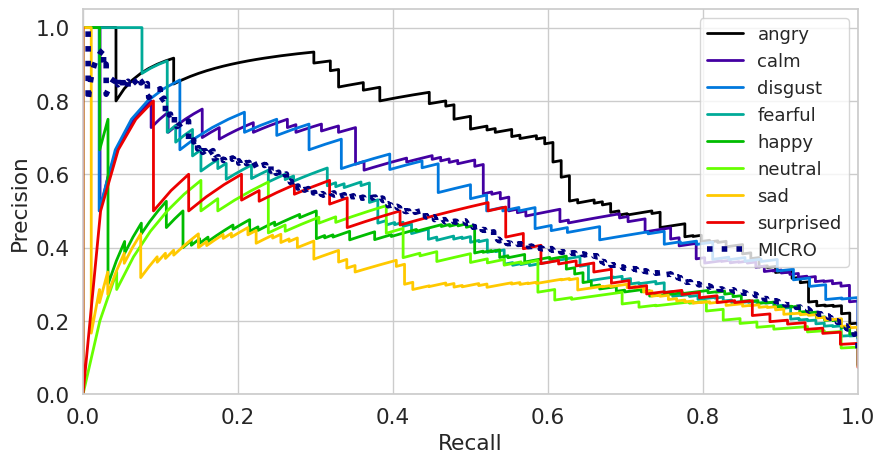

In [39]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("MLP_Precision_Recall.svg", format="svg")

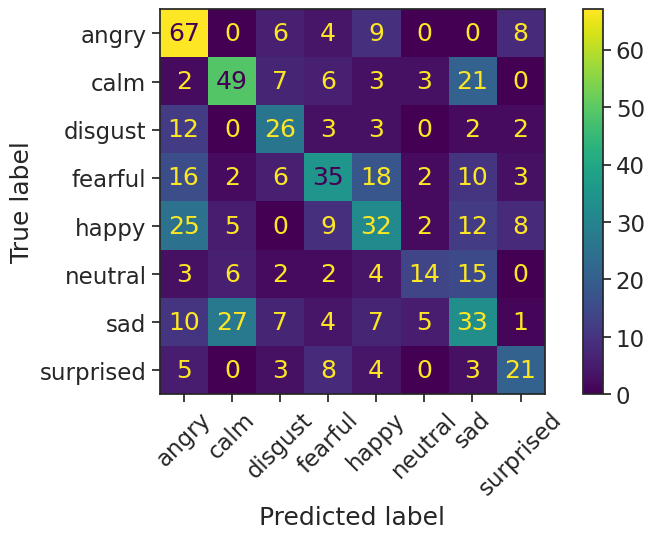

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay


sns.set(rc={'figure.figsize':(10, 5)})
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation = 45)

plt.savefig("conf_matrix_SVC.pdf", format="pdf")

### All (50%)

In [31]:
clf = SVC(
    C=10, 
    gamma='auto', 
    kernel='rbf',
    random_state=0,
    probability=True
)

clf.fit(X_train_50, y_train_50)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC %s" % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.4418604651162791
              precision    recall  f1-score   support

       angry       0.54      0.78      0.63        94
        calm       0.53      0.54      0.53        91
     disgust       0.41      0.42      0.41        48
     fearful       0.41      0.39      0.40        92
       happy       0.38      0.39      0.38        93
     neutral       0.36      0.22      0.27        46
         sad       0.34      0.30      0.32        94
   surprised       0.45      0.32      0.37        44

    accuracy                           0.44       602
   macro avg       0.43      0.42      0.42       602
weighted avg       0.43      0.44      0.43       602

ROC-AUC 0.8435209746629906


### Just Speech

In [32]:
clf = SVC(
    C=10, 
    gamma='auto', 
    kernel='rbf',
    random_state=0,
    probability=True
)

clf.fit(X_train_speech, y_train_speech)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC %s" % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.3787375415282392
              precision    recall  f1-score   support

       angry       0.46      0.53      0.49        94
        calm       0.47      0.47      0.47        91
     disgust       0.26      0.62      0.37        48
     fearful       0.48      0.27      0.35        92
       happy       0.28      0.28      0.28        93
     neutral       0.67      0.09      0.15        46
         sad       0.32      0.31      0.31        94
   surprised       0.49      0.48      0.48        44

    accuracy                           0.38       602
   macro avg       0.43      0.38      0.36       602
weighted avg       0.42      0.38      0.37       602

ROC-AUC 0.7886177794857252


### Just Song

In [33]:
clf = SVC(
    C=10, 
    gamma='auto', 
    kernel='rbf',
    random_state=0,
    probability=True
)

clf.fit(X_train_song, y_train_song)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, zero_division=0, labels=np.unique(y_pred)))
#print("ROC-AUC %s" % roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.3538205980066445
              precision    recall  f1-score   support

       angry       0.38      0.87      0.53        94
        calm       0.47      0.34      0.39        91
     fearful       0.23      0.46      0.31        92
       happy       0.47      0.28      0.35        93
     neutral       0.41      0.20      0.26        46
         sad       0.36      0.24      0.29        94

   micro avg       0.35      0.42      0.38       510
   macro avg       0.39      0.40      0.36       510
weighted avg       0.39      0.42      0.37       510

